# Deep Learning für Visual Computing: Übungsblatt 06

**Von: Maximilian Mundt, Radmehr Nouri Inanlou**

**Abgabe: 01.06.2022**

In [1]:
import torch
import handout
import visualize
from torch.utils.data import DataLoader


*Bei diesem Zettel haben wir wieder mehr Zeit mit dem Verstehen der Aufgaben verbracht als mit dem wirklichen Coden, das war leider etwas frustrierend. Wir wussten nicht genau, was wir denn jetzt eigentlich machen sollten, besonders bei Aufgaben wie "Bauen Sie ein CNN, das dem VGG-Netz ähnlich ist". Wir haben in `handout.py` immer mal wieder den Konstruktur der Klassen etwas geändert, weil sie wie sie vorher waren für uns wenig Sinn gemacht haben bzw. irgendwie missverständlich waren, hoffentlich ist das in Ordnung.*

## a) Schwierigkeiten beim Training eines NN

Finden Sie die 5 Probleme, die sich in dem Code verstecken, beheben Sie die Probleme und erklären
Sie was der Fehler war.

*Die Fehler haben wir in der Errors Datei verbessert und dabei immer kommentiert, was der Fehler war. In den Methoden insgesamt haben wir 4 Fehler gefunden und meinen, den 5. in dem `__name__ == "__main__"`-Teil gefunden zu haben.*

In Aufgabenteil 2 in `errors.py`, soll ein MLP trainiert werden, dass 18 Layer
hat und Sigmoid Aktiverungsfunktionen verwendet. Kann das funktionieren und was
passiert wenn wir stattdessen ReLU verwenden würden? Begründen Sie ihre Antwort
sowohl mit theoretischen als auch empirischen Beobachtungen.

*Durch die Visualisierungen und die Accuracy von 50 Prozent nach dem Training sieht man schon, dass das Modell so nicht gut funktionieren kann. Hier handelt es sich um das Vanishing Gradient Problem, denn durch die Sigmoid Funktion in jedem Layer wird der Gradient einfach viel zu klein. Wenn man nun noch die Gradienten aller 18 Layer bei der Backpropagation zusammenmultipliziert, dann wird das Ergebnis immer kleiner und so kann das Netzwerk kaum bzw. gar nicht trainieren. So viel zur Theorie, dies sieht man auch praktisch, wenn man sich die Gewichte und Gradienten der Layer anschaut (siehe `errors.py` am Ende)*

*ReLU würde das Problem hier nur teilweise beheben (in der Theorie), da die Gradienten bei dieser Funktion nicht so unendlich klein werden. Wir haben das Netzwerk mit ReLU und 18 Layern getestet, es performed aber nicht besser als mit Sigmoid. 18 Layer sind hier generell für diese Aufgabe einfach viel zu viel, da kann man nicht viel ändern.*

## b) Konvolutions-Netzwerke und Klassifizierung

Vervollständigen Sie die Funktionen ``train_multiclass`` und ``evaluate_multiclass``
so dass ein Neuronales Netzwerk für "multiclass"-Klassifikation trainiert werden kann.

*siehe `handout.py`*

Vervollständigen Sie die Klassen ``ConvBlock`` und ``MultiClassifierCNN`` in ``handout.py``.

*siehe `handout.py`*

Trainieren Sie Ihr CNN auf dem FashionMNIST Datensatz entsprechend
der folgenden drei Methoden: ...
Visualisieren Sie die Fehlerkurve während des Trainings, geben Sie die Genauigkeit
auf dem Test-Datensatz vor und nach dem Training der CNNs an und erläutern Sie
Ihre Beobachtungen. 

*Wir trainieren hier nur durch die 3. Methode mit geshuffelten Daten und Batch Size 64. Die ersten beiden Methoden wären ja wahrscheinlich dafür dagewesen zu zeigen, dass das sortieren und gruppieren generell kein guter Ansatz zum Trainieren ist, so beeinflusst man ja das Netz, indem man am Anfang immer nur "dieselben" Daten als Trainingsinput hat. Das Training hat übrigens 22 min gedauert mit einem Ryzen 5 3600.*

In [2]:
train_data = handout.FashionMNISTDataset(train=True)
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=64)

model = handout.MultiClassifierCNN(img_shape=(28, 28, 1), n_classes=10, activation_fn=torch.nn.ReLU)
optimizer = torch.optim.Adam(model.parameters())

loss_curve = handout.train_multiclass(train_dataloader, model, optimizer, 10)


Epoch 1/10: CrossEntropy = 0.3986
Epoch 2/10: CrossEntropy = 0.3020
Epoch 3/10: CrossEntropy = 0.1788
Epoch 4/10: CrossEntropy = 0.0920
Epoch 5/10: CrossEntropy = 0.2360
Epoch 6/10: CrossEntropy = 0.0229
Epoch 7/10: CrossEntropy = 0.0495
Epoch 8/10: CrossEntropy = 0.0539
Epoch 9/10: CrossEntropy = 0.0297
Epoch 10/10: CrossEntropy = 0.0389


*Wir plotten hier nur jeden 100sten Wert, weil das Diagramm sonst sehr voll wäre.*

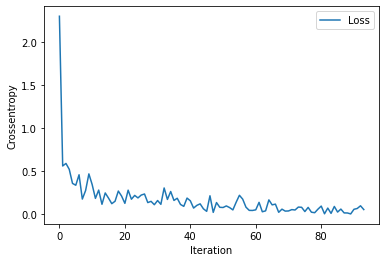

In [3]:
visualize.show_loss_curve(loss_curve[::100])

In [6]:
test_data = handout.FashionMNISTDataset(train=False)
test_dataloader = DataLoader(train_data)

accuracy = handout.evaluate_multiclass(test_dataloader, model)
print("Accuracy:", round(accuracy, 4))

Accuracy: 0.9891


*Irgendwas ist hier oder beim Training bestimmt schiefgelaufen. 98 Prozent ist gefühlt viel zu hoch für eine solche Aufgabe, oder?*

Vervollständigen Sie die Klasse ``MultiClassifierMLP`` und trainieren Sie
dieses MLP entsprechend den Erkenntnissen aus dem vorherigen Aufgabenteil. Visualisieren Sie die Fehlerkurve während des Trainings, geben Sie die Genauigkeit auf dem
Test-Datensatz an und vergleichen Sie die Ergebnisse mit den Ergebnissen des CNNs.
Gehen Sie in Ihrem Vergleich auf die Anzahl der Gewichte und die Trainingszeit beider
Netzwerke ein.


*Was soll man denn hier jetzt bauen? Wie viele Layer? Wie viele Neuronen?*